In [5]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)
## 그래프 생성 부분
xtrain = np.array([[1.,1.,1.],[1.,2.,3.]]) # 하나당 하나의 b까지 포함
ytrain = np.array([1.,2.,3.]).reshape(1,-1)
x = tf.placeholder(dtype=tf.float32, shape=[2,None]) 
y = tf.placeholder(dtype=tf.float32, shape=[1,None])
# b = tf.Variable(tf.random_uniform([1,1]), name='bias') # 이렇게 해야 2차원으로 만들어지네!
w = tf.Variable([[1.,2.]], name='weight')
hf = tf.matmul(w,x)
cost = tf.reduce_mean(tf.square(hf-y))

lr = 0.02
# gradient_b = tf.reduce_mean(hf-y)
# gradient_w = tf.reduce_mean((hf-y)*xtrain[1])


# temp = tf.stack([gradient_b, gradient_w], axis=0)

gradient_w = tf.gradients(cost, w)[0] * 2

descent = w - lr * gradient_w

update = tf.assign(w,descent)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for step in range(20001):
    sess.run(update, feed_dict={x:xtrain,y:ytrain})
    if step%2000==0:
        print(step)
        print("cost: {}".format(sess.run(cost,feed_dict={x:xtrain,y:ytrain})))
        print("w: {}".format(sess.run(w,feed_dict={x:xtrain,y:ytrain})))
        print("grd: {}".format(sess.run(tf.gradients(cost, w), feed_dict={x:xtrain,y:ytrain})))
        print("grd_w: {}".format(sess.run(gradient_w, feed_dict={x:xtrain,y:ytrain})))
        print(sess.run(hf,feed_dict={x:[[1.],[100.]]}))


0
cost: 3.0125629901885986
w: [[0.76      1.4666667]]
grd: [array([[3.3866668, 7.3955555]], dtype=float32)]
grd_w: [[ 6.7733335 14.791111 ]]
[[147.42667]]
2000
cost: 1.515824548129971e-13
w: [[1.0106603e-06 9.9999952e-01]]
grd: [array([[ 0.0000000e+00, -6.3578284e-07]], dtype=float32)]
grd_w: [[ 0.0000000e+00 -1.2715657e-06]]
[[99.999954]]
4000
cost: 1.515824548129971e-13
w: [[1.0106603e-06 9.9999952e-01]]
grd: [array([[ 0.0000000e+00, -6.3578284e-07]], dtype=float32)]
grd_w: [[ 0.0000000e+00 -1.2715657e-06]]
[[99.999954]]
6000
cost: 1.515824548129971e-13
w: [[1.0106603e-06 9.9999952e-01]]
grd: [array([[ 0.0000000e+00, -6.3578284e-07]], dtype=float32)]
grd_w: [[ 0.0000000e+00 -1.2715657e-06]]
[[99.999954]]
8000
cost: 1.515824548129971e-13
w: [[1.0106603e-06 9.9999952e-01]]
grd: [array([[ 0.0000000e+00, -6.3578284e-07]], dtype=float32)]
grd_w: [[ 0.0000000e+00 -1.2715657e-06]]
[[99.999954]]
10000
cost: 1.515824548129971e-13
w: [[1.0106603e-06 9.9999952e-01]]
grd: [array([[ 0.0000000e+00

In [3]:
gradient_w

<tf.Tensor 'mul:0' shape=(1, 2) dtype=float32>

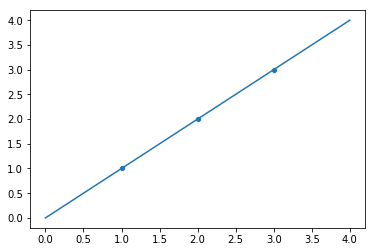

In [7]:
import seaborn as sns
X = np.linspace(0, 4, 5)
f = lambda x : x * sess.run(w)[0][1] + sess.run(w)[0][0]
Y = [ f(i) for i in X ]

sns.scatterplot(x = xtrain[1], y = ytrain[0])
sns.lineplot(x = X , y = Y)